<a href="https://colab.research.google.com/github/m-Ash1/object-detection-using-YOLO/blob/master/Object_detection_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade mxnet gluoncv
!pip install torch==1.13.1

In [ ]:
import gluoncv
import mxnet
import os
from matplotlib import pyplot as plt

In [ ]:
from PIL import Image
import cv2
import torch


data_path = 'drive/MyDrive/dataset2/book'
img_list = os.listdir(data_path)
test_images = []
for img in img_list:
        test_images.append(data_path + '/' + img)
test_images

In [ ]:
from gluoncv.data.transforms.presets import rcnn, ssd, center_net, yolo
from mxnet import nd
from gluoncv import model_zoo

normalized_batched_imgs, orig_imgs = yolo.load_test(test_images)

In [ ]:
yolo3 = model_zoo.get_model("yolo3_darknet53_coco",
                                                  pretrained=True)

100%|██████████| 224190/224190 [00:08<00:00, 26495.38KB/s]


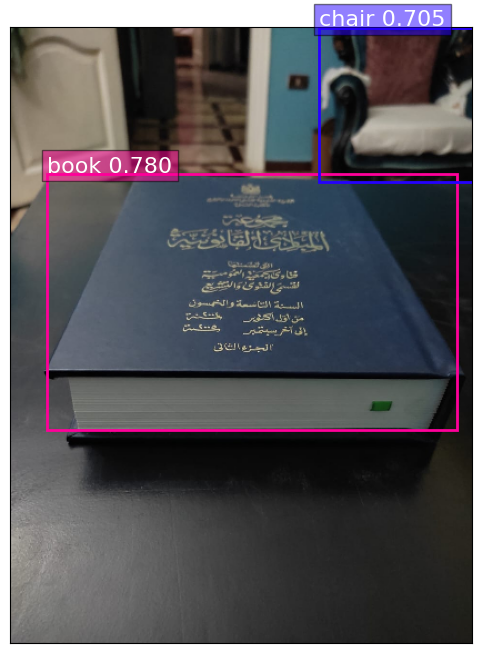

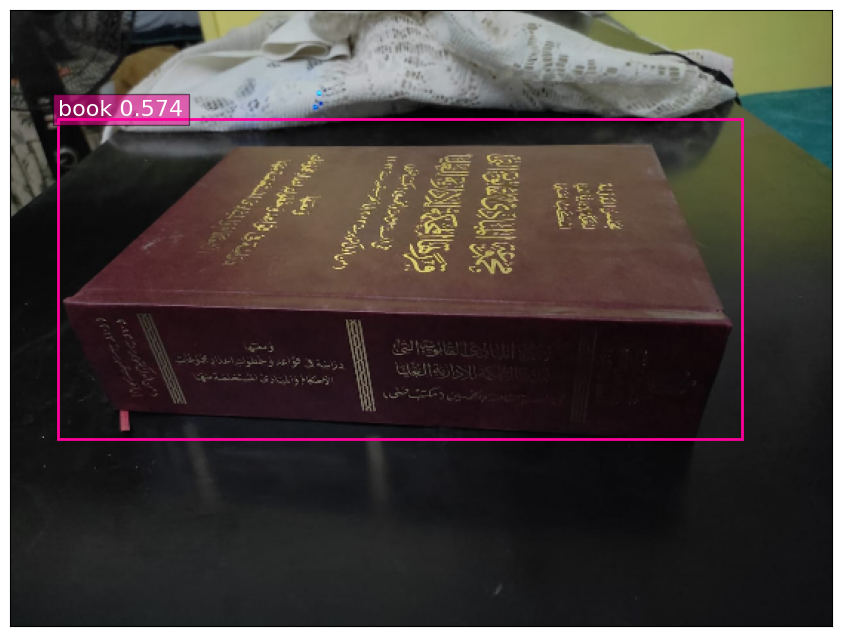

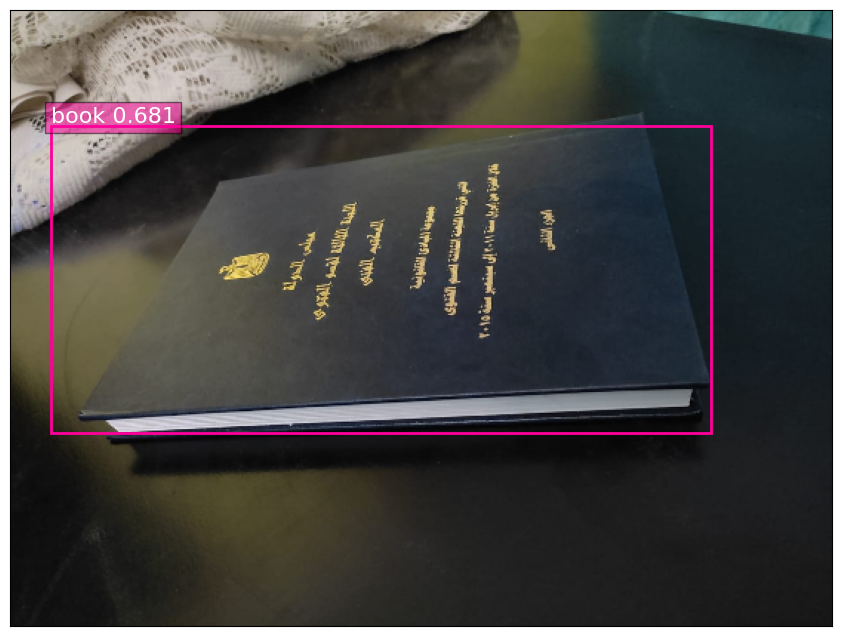

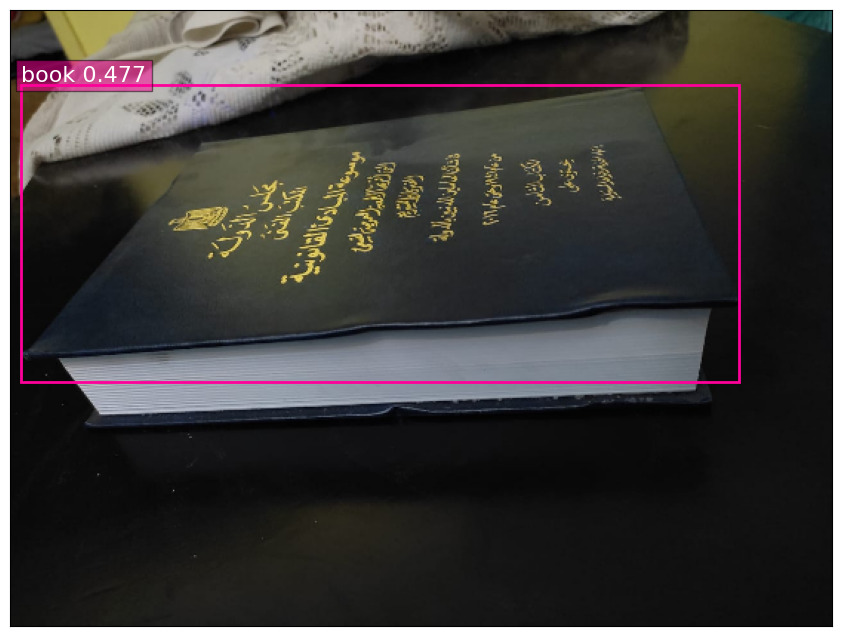

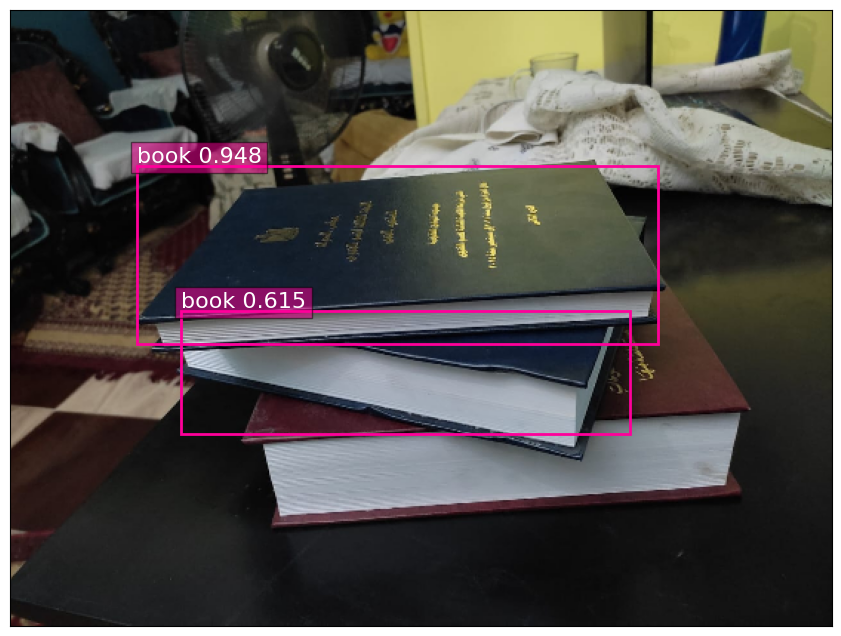

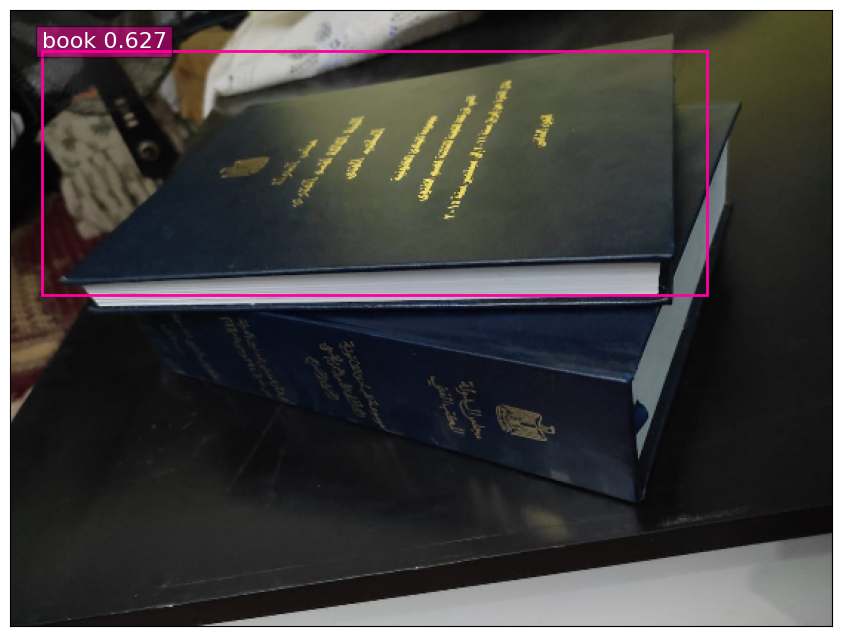

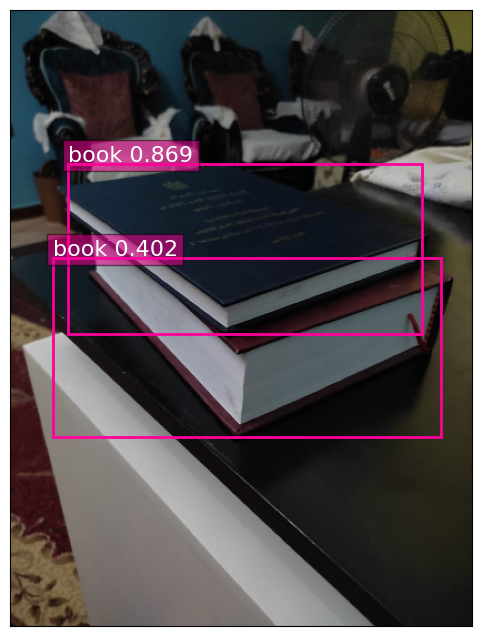

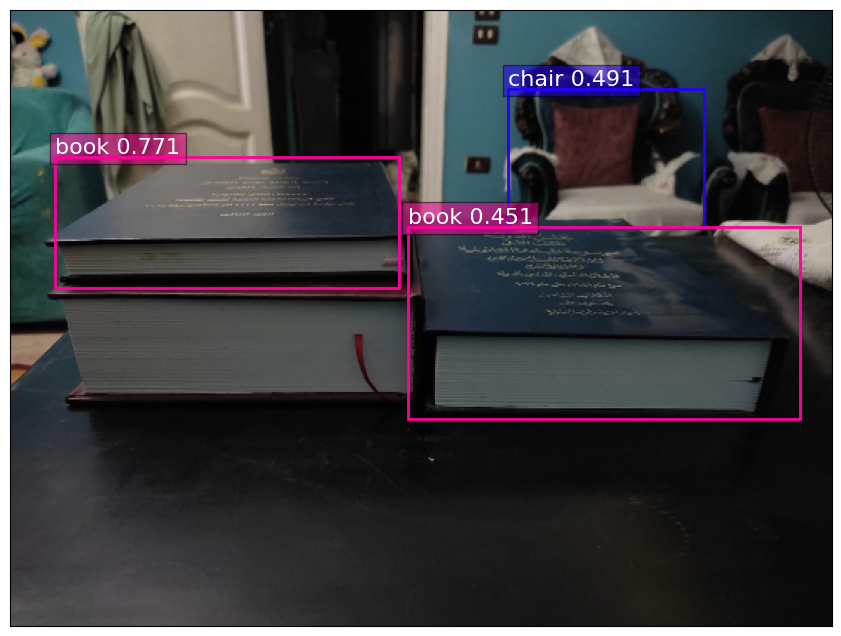

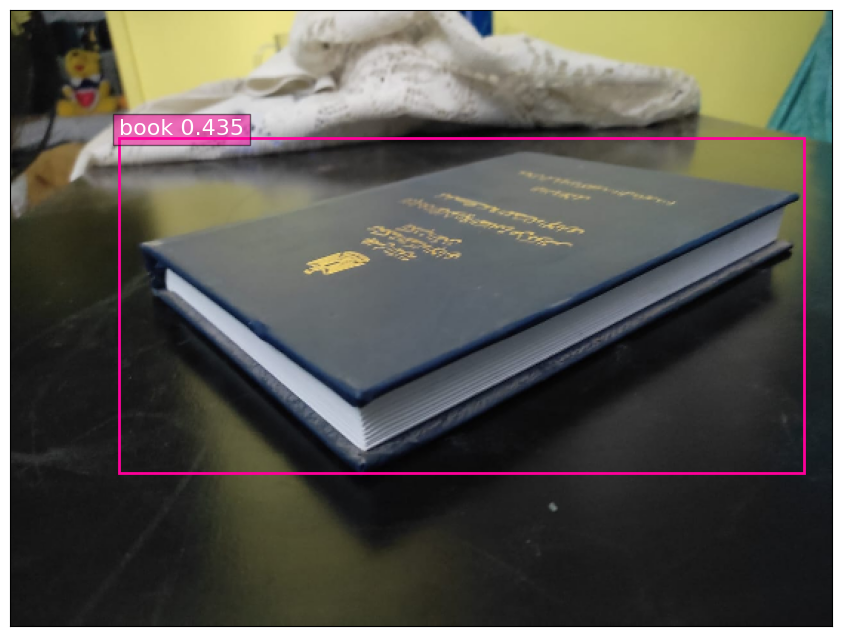

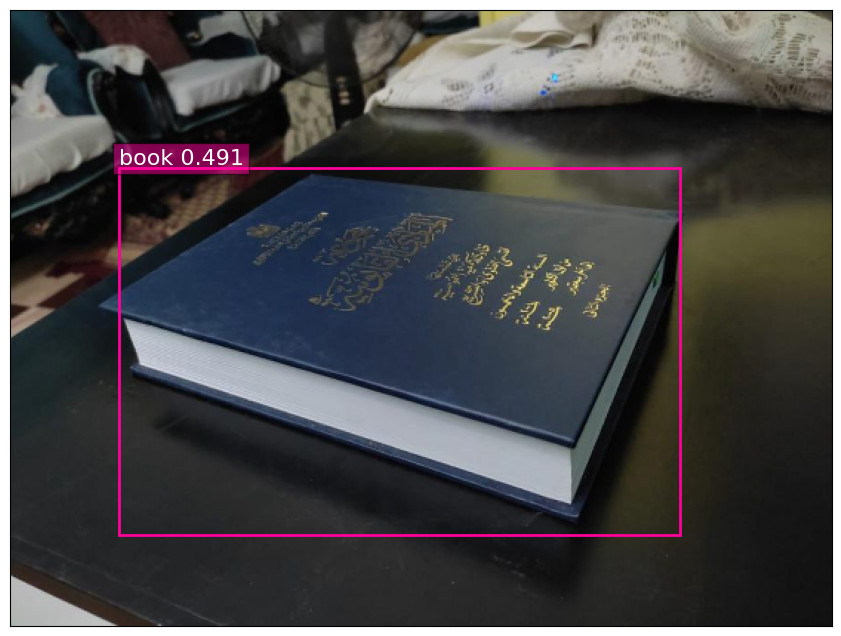

In [ ]:
from gluoncv.utils import viz
import matplotlib.pyplot as plt

for i in range(0,len(test_images)):
      box_ids1, scores1, bboxes1 = yolo3(normalized_batched_imgs[i])

      fig = plt.figure(figsize=(14,8))
      ax = fig.add_subplot(111)
      plt.xticks([]);plt.yticks([]);

      viz.plot_bbox(orig_imgs[i],
                  bboxes=bboxes1[0],
                  scores=scores1[0],
                  labels=box_ids1[0],
                  class_names=yolo3.classes,
                  thresh=0.3, fontsize=16, linewidth=2.0,
                  ax=ax
                );